请将运行结果和图等实验步骤结果保留在jupyter之中

## 一、Pytorch基本操作考察

### 操作1，矩阵的减法操作
使用 𝐓𝐞𝐧𝐬𝐨𝐫 初始化一个 𝟏×𝟑 的矩阵𝑴 和一个𝟐×𝟏 的矩阵𝑵，对两矩阵进行减法操作（要求实现三种不同的形式），给出结果并分析三种方式的不同（如果出现报错，分析报错的原因），同时需要指出在计算过程中发生了什么

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 使用tensor创建矩阵N，并对两个矩阵进行减法操作，使用三种不同的形式
### 首先创建两个不同的tensor
N1 = torch.tensor([[1, 2, 3]], dtype=torch.float32)
N2 = torch.tensor([[4], [5]], dtype=torch.float32)

N = N1 - N2

print("N1:", N1)
print("N2:", N2) 
print("N:", N)

N1: tensor([[1., 2., 3.]])
N2: tensor([[4.],
        [5.]])
N: tensor([[-3., -2., -1.],
        [-4., -3., -2.]])


In [3]:
### 使用torch.sub函数进行减法操作
N = torch.sub(N1, N2)
print("N after sub:", N)

N after sub: tensor([[-3., -2., -1.],
        [-4., -3., -2.]])


In [4]:
print("N1.shape:", N1.shape)
print("N2.shape:", N2.shape)

N1.shape: torch.Size([1, 3])
N2.shape: torch.Size([2, 1])


In [6]:
### 使用tensor对象本身的sub_方法进行减法操作
N = N1.sub_(N2).view(2, 3)
print("N after sub_:", N1)
N = N2.sub_(N1)
print("N after sub_ on N2:", N)

RuntimeError: output with shape [1, 3] doesn't match the broadcast shape [2, 3]

#### 错误分析
提示输出形状不匹配广播形状，通过查阅资料发现，矩阵减法的in-place版本sub_()函数会直接修改输入张量，而不是创建一个新的张量,下面进行实验

In [7]:
#### 错误分析代码
demo_m1 = torch.arange(1, 7).view(2, 3)
demo_m2 = torch.arange(5, 11).view(2, 3)

print("demo_m1 before sub_: ", demo_m1)

m = demo_m1.sub_(demo_m2)

print("m: ", m)

print("demo_m1: after sub_: ", demo_m1)

#### 将demo_m1的某个元素修改为100，打印m矩阵会不会发生变化
demo_m1[1, 1] = 100
print("demo_m1 after modification: ", demo_m1)
print("m after demo_m1 modification: ", m)

demo_m1 before sub_:  tensor([[1, 2, 3],
        [4, 5, 6]])
m:  tensor([[-4, -4, -4],
        [-4, -4, -4]])
demo_m1: after sub_:  tensor([[-4, -4, -4],
        [-4, -4, -4]])
demo_m1 after modification:  tensor([[ -4,  -4,  -4],
        [ -4, 100,  -4]])
m after demo_m1 modification:  tensor([[ -4,  -4,  -4],
        [ -4, 100,  -4]])


对于demo_m1矩阵来说，调用sub_()函数的时候会直接在自己的位置进行操作
可以得出，实验中1\*3的矩阵N1减去2\*1的矩阵N2，会触发广播机制，使得输出结果需要2*3的空间进行存放，但是sub_本身只能在调用者的1\*3的内存空间内进行操作。由于内存空间不足，所以就出现了output with shape [1, 3] doesn't match the broadcast shape [2, 3]的运行时异常

同时也可以看到这里sub_()函数的结果直接赋值给m的话，m只是demo_m1的引用，共享一个内存空间

In [298]:
#### 第四种减法
M_expanded = N1.expand_as(N)  # 显式广播
N_expanded = N2.expand_as(N)
result3 = M_expanded - N_expanded

In [299]:
print(result3)

tensor([[-3., -2., -1.],
        [-4., -3., -2.]])


### 矩阵的转置和内积
1. 利用𝐓𝐞𝐧𝐬𝐨𝐫 创建两个大小分别 𝟑×𝟐 和 𝟒×𝟐 的随机数矩阵 𝑷 和 𝑸 ，要求服从均值为0，标准差0.01为的正态分布；
2. 对第二步得到的矩阵 𝑸 进行形状变换得到 𝑸 的转置 𝑸^𝑻；③ 对上述得到的矩阵 𝑷 和矩阵 𝑸^𝑻 求内积

In [ ]:
#### 创建矩阵
m1 = torch.normal(mean=0, std=0.01, size=(3, 2))
m2 = torch.normal(mean=0, std=0.01, size=(4, 2))
m2_transpose = m2.t()  # 转置操作
m_product = torch.mm(m1, m2_transpose)
print("m1:", m1)
print("m2:", m2) 
print("转置操作后的m2: ", m2_transpose)
print("m1和转置后的m2的内积：", m_product)

m1: tensor([[-0.0159,  0.0135],
        [-0.0122, -0.0038],
        [-0.0028, -0.0008]])
m2: tensor([[-0.0199,  0.0078],
        [ 0.0113, -0.0002],
        [ 0.0104,  0.0138],
        [-0.0147,  0.0174]])
转置操作后的m2:  tensor([[-0.0199,  0.0113,  0.0104, -0.0147],
        [ 0.0078, -0.0002,  0.0138,  0.0174]])
m1和转置后的m2的内积： tensor([[ 4.2110e-04, -1.8180e-04,  2.1348e-05,  4.6739e-04],
        [ 2.1314e-04, -1.3699e-04, -1.7897e-04,  1.1352e-04],
        [ 5.0785e-05, -3.2070e-05, -4.0231e-05,  2.8614e-05]])


#### 进行梯度计算的实验

In [232]:
### 正常的梯度计算
x = torch.tensor(1.0, requires_grad = True)

y1 = x**2
y2 = x**3
y3 = y1 + y2
y3.backward()
gradient = x.grad
print("梯度为", gradient)

梯度为 tensor(5.)


In [233]:
# 在计算x**3时中断梯度跟踪
x = torch.tensor(1.0, requires_grad = True)

y1 = x**2
with torch.no_grad():
    y2 = x**3
y3 = y1 + y2
y3.backward()
gradient = x.grad
print("梯度为", gradient)

梯度为 tensor(2.)


## 二、动手实现 logistic 回归

In [292]:
import matplotlib.pyplot as plt # 导入必要的包
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
from torch.utils.data import DataLoader, TensorDataset

#### 从0开始手动实现logistic回归

In [293]:
n_sample = 1000

# 随机种子，可更改
np.random.seed(42)

# 定义X的
X = np.random.randn(n_sample, 2)  # 生成1000个样本，每个样本有2个特征

true_coef = np.array([-0.5, 3.5, -1.5])  # 故意使第二个特征权重更高

X_with_intercept = np.c_[np.ones(n_sample), X]  # 添加全1列作为截距
z = X_with_intercept @ true_coef

# 最后相当于z = -1.5 * x1 - 3.5 * x2 -0.5 作为概率, X1和X2是随机数，服从正态分布
# 最后通过sigmoid函数将z转换为概率
# 当 z = 0 时形成决策边界：2x₁ - 1.5x₂ - 0.5 = 0

probabilities = 1 / (1 + np.exp(-z))
# 根据概率生成二分类标签 (0/1)
y = np.random.binomial(1, probabilities)
# 此时y就是010101这样的序列

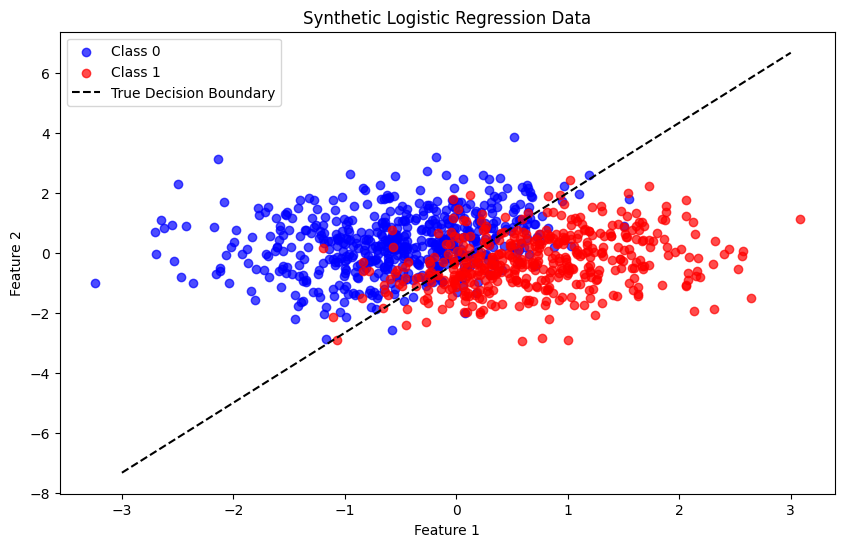

In [294]:
#### 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.7)

# 绘制真实决策边界 (z=0处)
x1_boundary = np.linspace(-3, 3, 100)
x2_boundary = -(true_coef[0] + true_coef[1]*x1_boundary) / true_coef[2]
plt.plot(x1_boundary, x2_boundary, 'k--', label='True Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Logistic Regression Data')
plt.show()

In [ ]:
### 设置训练集和测试集
train_slipt = 0.8
n_train = int(n_sample * train_slipt)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]
print(X_train.shape, y_train.shape)

(800, 2) (800,)


In [ ]:
import random
from sympy import Float
from torch import Tensor

class LogisticRegressionModel:
    def __init__(self, learning_rate=0.01, num_epochs=100, train_device=device, lambda_reg=0.01):
        self.lr = learning_rate
        self.epochs = num_epochs
        self.device = train_device
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.w = None
        self.loss_history = []
        self.train_acc_history = []
        self.test_acc_history = []
        self.n_iter = 0
        self.plot_x_test = None  # 用于存储测试集的x值，便于绘图
        self.plot_y_test = None  # 用于存储测试集的y值，便于绘图
        self.lambda_reg = lambda_reg  # 正则化参数
    
    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]  # 在X的第一列添加全1列作为截距项
    
    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))
    
    def fit(self, y_train, x_train, y_test, x_test):
        self.plot_x_test = x_test  # 存储测试集的x值，便于绘图
        self.plot_y_test = y_test  # 存储测试集的y值，便于绘图

        # 加入截距项
        x_train = self.add_intercept(x_train)
        x_test = self.add_intercept(x_test)

        y_train = torch.tensor(y_train, dtype=torch.float32) # 转换为tensor并调整形状
        y_test = torch.tensor(y_test, dtype=torch.float32) # 转换为tensor并调整形状
        x_train = torch.tensor(x_train, dtype=torch.float32)
        x_test = torch.tensor(x_test, dtype=torch.float32)

        # 加载训练数据
        self.x_train = x_train.to(self.device)
        self.y_train = y_train.to(self.device)
        self.x_test = x_test.to(self.device)
        self.y_test = y_test.to(self.device)

        # 初始化权重 
        self.w = torch.randn(self.x_train.shape[1], 1, device=self.device, dtype=torch.float32, requires_grad=True)  # 权重初始化为随机值

        for i in range(self.epochs):
            self.n_iter += 1  # 增加迭代次数
            # 前向传播
            logits = self.x_train @ self.w
            y_pred = self.sigmoid(logits)
            # 这里得到了预测的概率值

            # 计算预测概率值的损失
            y_pred = y_pred.view(-1)  # 确保y_pred是一个一维向量
            loss = self.loss_func(self.y_train, y_pred)
            
            loss.backward()  # 计算梯度

            with torch.no_grad():
                # 更新权重
                self.w -= self.lr * self.w.grad
                self.w.grad.zero_() # 清除梯度，便于后续运算

            demo_train = self.x_train @ self.w
            demo_train = self.sigmoid(demo_train)
            demo_train = demo_train.view(-1)  # 确保demo_train是一个一维向量
            demo_test = self.x_test @ self.w
            demo_test = self.sigmoid(demo_test)
            demo_test = demo_test.view(-1)  # 确保demo_test是一个一维向量

            train_acc = torch.mean((demo_train.round() == self.y_train).float()).item()  # 计算训练集准确率
            test_acc = torch.mean((demo_test.round() == self.y_test).float()).item()

            # 打印当前迭代的损失和准确率
            if i % 200 == 0 or i == self.epochs - 1:
                print(f"Epoch {i+1}/{self.epochs}, Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

            self.train_acc_history.append(train_acc)  # 记录训练集准确率
            self.loss_history.append(loss.item())  # 记录损失
            self.test_acc_history.append(test_acc)  # 记录测试集准确率

            # self.plot_training_history()
            # self.plot_training_line()
        self.plot_training_history()
        self.plot_training_line()

        self.w = self.w.view(3)  # 确保权重是列向量
        print(self.w)

    def predict(self, X):
        if X.shape[1] == 2:
            X = self.add_intercept(X)  # 添加截距项
        X = torch.tensor(X, dtype=torch.float32).to(self.device)  # 转换为tensor并移动到设备上
        if X.shape[1] != self.w.shape[0]:
            print("X的特征数与权重不匹配")
            return None
        logits = X @ self.w  # 计算logits
        pred = self.sigmoid(logits)
        return pred.round() # 返回0或1的预测结果
    
    def plot_training_line(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.plot_x_test[self.plot_y_test == 0, 0], self.plot_x_test[self.plot_y_test == 0, 1], color='blue', label='Class 0', alpha=0.7)
        plt.scatter(self.plot_x_test[self.plot_y_test == 1, 0], self.plot_x_test[self.plot_y_test == 1, 1], color='red', label='Class 1', alpha=0.7)

        # 绘制真实决策边界 (z=0处)
        x1_boundary = np.linspace(-3, 3, 100)
        x2_boundary = -(true_coef[0] + true_coef[1]*x1_boundary) / true_coef[2]
        plt.plot(x1_boundary, x2_boundary, 'k--', label='True Decision Boundary')

        # 绘制预测的决策边界
        x1_boundary = np.linspace(-3, 3, 100)
        x2_boundary = -(self.w[0].item() + self.w[1].item() * x1_boundary) / self.w[2].item()
        plt.plot(x1_boundary, x2_boundary, 'g-', label='Predicted Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.title('Synthetic Logistic Regression Data')
        plt.show()
        print(self.w)

    def plot_training_history(self):
        """绘制训练过程"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # 绘制损失曲线
        ax1.plot(range(self.n_iter), self.loss_history, label='Training Loss')
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Loss')
        ax1.grid(True)
        
        # 绘制准确率曲线
        ax2.plot(range(self.n_iter), self.train_acc_history, label='Train Accuracy')
        ax2.plot(range(self.n_iter), self.test_acc_history, label='Test Accuracy')
        ax2.set_title('Accuracy during Training')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)

        
        plt.tight_layout()
        plt.show()

        # 清除上一个输出
        if self.n_iter != self.epochs:
            clear_output(wait=False)  # wait=True 保留当前输出

    def evaluate(self, y_pred, y_label):
        accuracy = np.mean(y_pred == y_label)  # 计算准确率
        return accuracy
    

    # 自己实现的二分类交叉熵损失函数，加上一个正则项
    def loss_func(self, y_true, y_pred):
        # 计算二分类交叉熵损失+正则
        return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)) + self.lambda_reg * (self.w**2).sum()  # 正则化项为L2正则化

Epoch 1/10000, Loss: 0.9274, Train Accuracy: 0.5737, Test Accuracy: 0.5450
Epoch 201/10000, Loss: 0.8233, Train Accuracy: 0.6062, Test Accuracy: 0.5900
Epoch 401/10000, Loss: 0.7429, Train Accuracy: 0.6387, Test Accuracy: 0.6200
Epoch 601/10000, Loss: 0.6812, Train Accuracy: 0.6825, Test Accuracy: 0.6450
Epoch 801/10000, Loss: 0.6341, Train Accuracy: 0.7175, Test Accuracy: 0.6750
Epoch 1001/10000, Loss: 0.5984, Train Accuracy: 0.7412, Test Accuracy: 0.7100
Epoch 1201/10000, Loss: 0.5713, Train Accuracy: 0.7637, Test Accuracy: 0.7250
Epoch 1401/10000, Loss: 0.5509, Train Accuracy: 0.7825, Test Accuracy: 0.7500
Epoch 1601/10000, Loss: 0.5356, Train Accuracy: 0.8075, Test Accuracy: 0.7650
Epoch 1801/10000, Loss: 0.5241, Train Accuracy: 0.8150, Test Accuracy: 0.7800
Epoch 2001/10000, Loss: 0.5155, Train Accuracy: 0.8300, Test Accuracy: 0.7800
Epoch 2201/10000, Loss: 0.5091, Train Accuracy: 0.8388, Test Accuracy: 0.8000
Epoch 2401/10000, Loss: 0.5043, Train Accuracy: 0.8450, Test Accuracy: 

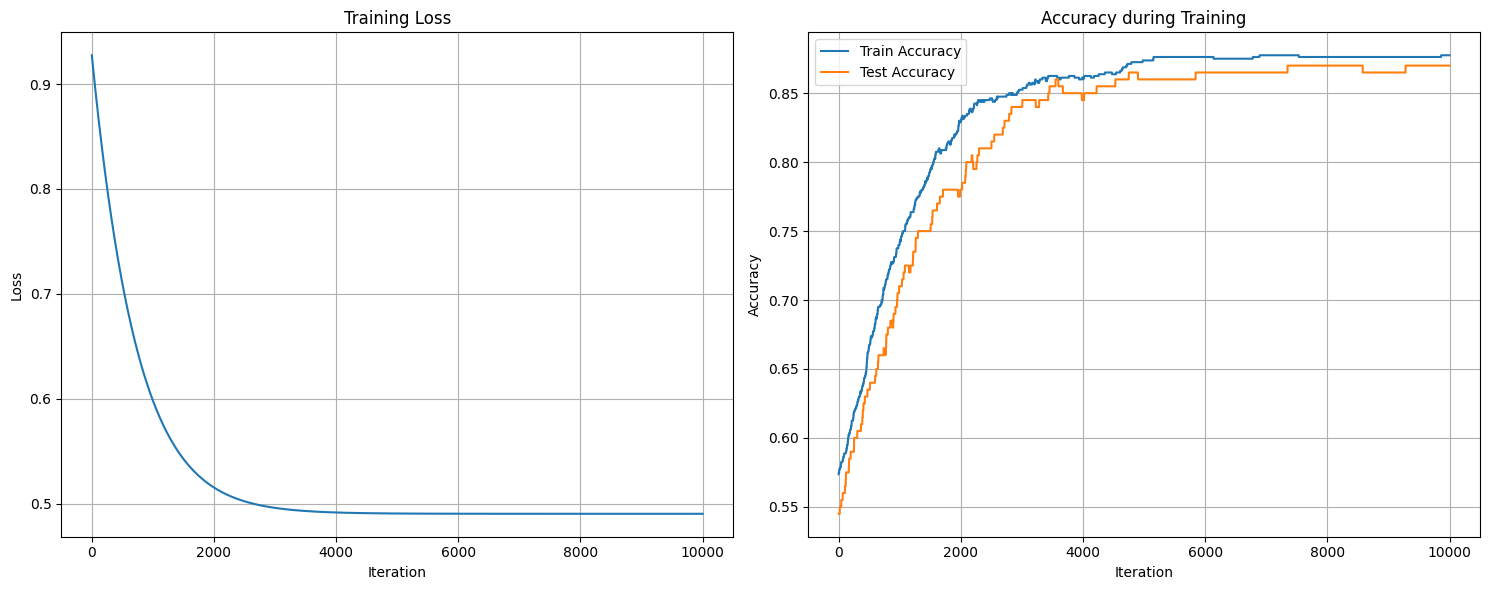

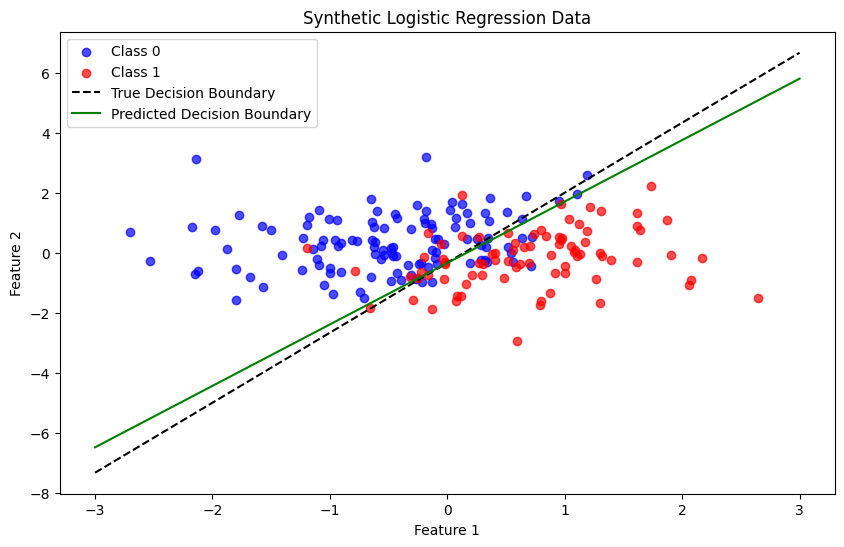

tensor([[-0.1858],
        [ 1.1119],
        [-0.5429]], device='cuda:0', requires_grad=True)
tensor([-0.1858,  1.1119, -0.5429], device='cuda:0', grad_fn=<ViewBackward0>)
测试集的准确率： 0.87


In [ ]:
model = LogisticRegressionModel(learning_rate=0.0026, num_epochs=10000, train_device=device, lambda_reg=0.05)
model.fit(y_train, X_train, y_test, X_test)
res = model.predict(X_test)
res = res.cpu().detach().numpy()  # 将预测结果转换为numpy数组
print("测试集的准确率：", model.evaluate(res, y_test))

#### 使用torch.nn库实现logistic回归

In [107]:
# 重新创建一个类，重用上面已经实现的部分函数
class LogisticRegressionModelWithNN(nn.Module):
    def __init__(self):
        super(LogisticRegressionModelWithNN, self).__init__()
        self.cell = torch.nn.Linear(2, 1)  # 使用nn.Linear创建线性层，输入特征数为3，输出特征数为1
        self.test_acc_history = []  # 记录训练集准确率
        self.loss_history = []  # 记录损失
        self.train_acc_history = []  # 记录测试集准确率
        
    
    def forward(self, x):
        x = self.cell(x)
        return x.sigmoid()  # 使用sigmoid函数将输出转换为概率值

    

In [129]:
from math import e

split = 0.8
epoch = 1000
learning_rate = 0.0025

n_train = int(n_sample * split)
probabilities = 1 / (1 + np.exp(-z))
# 根据概率生成二分类标签 (0/1)
y = np.random.binomial(1, probabilities)
x_train, x_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

def train_func(epoch, split, learning_rate):
    model_nn = LogisticRegressionModelWithNN().to(device)
    opt = torch.optim.Adam(model_nn.parameters(), lr=learning_rate)  # 使用Adam优化器
    loss = nn.BCEWithLogitsLoss()  # 使用二分类交叉熵损失函数

    train_dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 使用DataLoader加载数据


    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

    model_nn.train()  # 设置模型为训练模式

    for i in range(epoch):
        opt.zero_grad
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            output = model_nn(data)  # 前向传播
            loss_value = loss(output.view(-1), label)  # 计算损失
            loss_value.backward()  # 反向传播
            opt.step()  # 更新参数
        # 计算训练集和测试集的准确率
        demo_train = model_nn(torch.tensor(x_train, dtype=torch.float32).to(device))
        demo_train = demo_train.view(-1)  # 确保demo_train是一个一维向量
        demo_test = model_nn(torch.tensor(x_test, dtype=torch.float32).to(device))
        demo_test = demo_test.view(-1)  # 确保demo_test是一个一维向量
        train_of_acc = torch.mean((demo_train.round() == torch.tensor(y_train, dtype=torch.float32).to(device)).float()).item()  # 计算训练集准确率
        test_of_acc = torch.mean((demo_test.round() == torch.tensor(y_test, dtype=torch.float32).to(device)).float()).item()
        if i % 200 == 0 or i == epoch - 1:
            print(f"Epoch {i+1}/{epoch}, Loss: {loss_value.item():.4f}, Train Accuracy: {train_of_acc:.4f}, Test Accuracy: {test_of_acc:.4f}")
        # 记录训练集和测试集的准确率
        model_nn.train_acc_history.append(train_of_acc)  # 记录训练集准确率
        model_nn.loss_history.append(loss_value.item())  # 记录损失
        model_nn.test_acc_history.append(test_of_acc)  # 记录测试集准确率
    print(model_nn)
    return model_nn

In [130]:
#### 绘制训练过程的数据
def plot_training_history(model_nn):
    """绘制训练过程"""
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='blue', label='Class 0', alpha=0.7)
    plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='green', label='Class 1', alpha=0.7)
    
    x1_boundary = np.linspace(-3, 3, 100)
    x2_boundary = -(model_nn.cell.bias.item() + model_nn.cell.weight[0, 0].item() * x1_boundary) / model_nn.cell.weight[0, 1].item()
    plt.plot(x1_boundary, x2_boundary, 'k--', label='Predicted Decision Boundary')

    # 绘制预测的决策边界
    x1_boundary = np.linspace(-3, 3, 100)
    x2_boundary = -(model_nn.cell.bias.item() + model_nn.cell.weight[0, 0].item() * x1_boundary) / model_nn.cell.weight[0, 1].item()
    plt.plot(x1_boundary, x2_boundary, 'g-', label='Predicted Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Synthetic Logistic Regression Data')
    plt.show()
    print(model_nn.cell.weight)


In [131]:
def plot_train_data(model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 绘制损失曲线
    ax1.plot(range(epoch), model.loss_history, label='Training Loss')
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    
    # 绘制准确率曲线
    ax2.plot(range(epoch), model.train_acc_history, label='Train Accuracy')
    ax2.plot(range(epoch), model.test_acc_history, label='Test Accuracy')
    ax2.set_title('Accuracy during Training')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

Epoch 1/1000, Loss: 0.7691, Train Accuracy: 0.6362, Test Accuracy: 0.6000
Epoch 201/1000, Loss: 0.5555, Train Accuracy: 0.8737, Test Accuracy: 0.8250
Epoch 401/1000, Loss: 0.5690, Train Accuracy: 0.8800, Test Accuracy: 0.8400
Epoch 601/1000, Loss: 0.5735, Train Accuracy: 0.8725, Test Accuracy: 0.8350
Epoch 801/1000, Loss: 0.5621, Train Accuracy: 0.8762, Test Accuracy: 0.8300
Epoch 1000/1000, Loss: 0.5174, Train Accuracy: 0.8762, Test Accuracy: 0.8300
LogisticRegressionModelWithNN(
  (cell): Linear(in_features=2, out_features=1, bias=True)
)


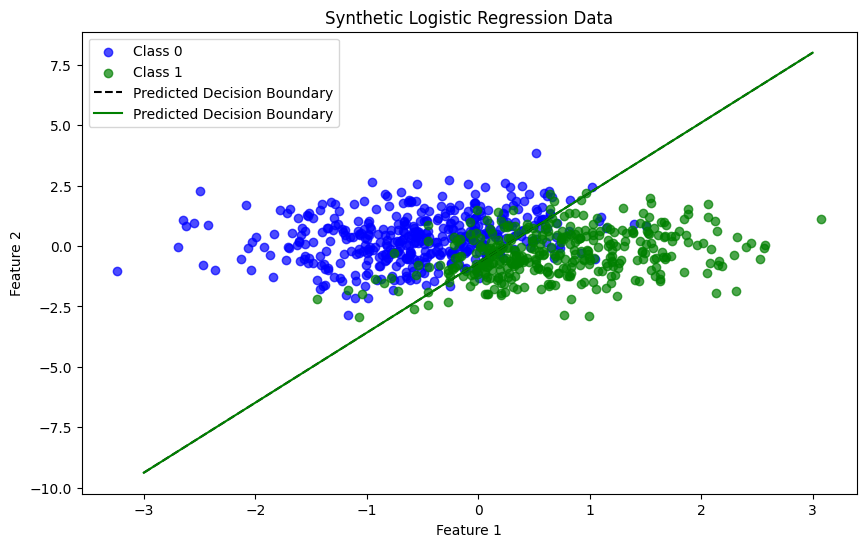

Parameter containing:
tensor([[ 64.9843, -22.4288]], device='cuda:0', requires_grad=True)


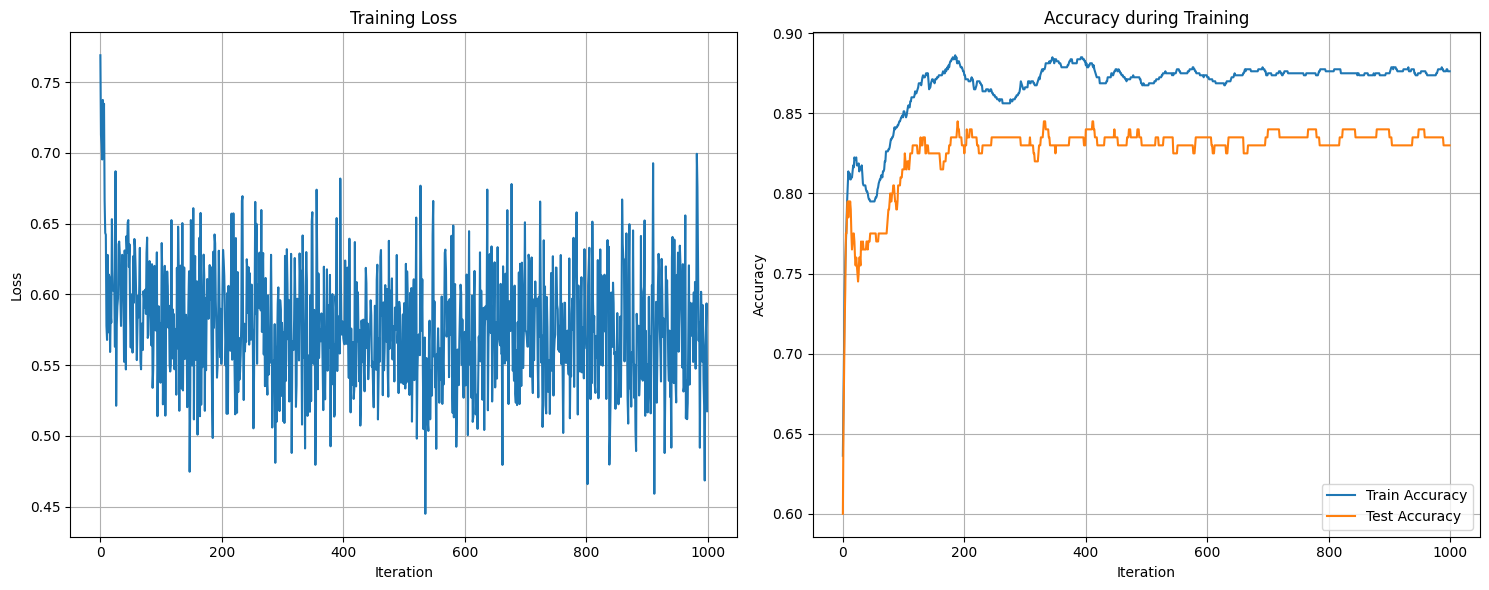

In [132]:
model_nn = train_func(epoch=epoch, split=split, learning_rate=learning_rate)
plot_training_history(model_nn)
plot_train_data(model_nn)

## 三、动手实现 softmax 回归

In [186]:
import torchvision

## 下载必要的数据集，设置batch_size并且将数据集分为训练集和测试集
batch_size = 128

trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download = True)
print(len(mnist_train), len(mnist_test))
print(len(mnist_test[0]))

60000 10000
2


In [187]:
#### 观察这些数据集
print(mnist_test[0][0].shape)

torch.Size([1, 28, 28])


In [188]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [189]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols*scale, num_rows*scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    print("Before flatten axes are:")
    print(axes.shape)
    axes = axes.flatten() # 这个是让它在后面的代码中好迭代
    print("After flatten axes are:")
    print(axes.shape)
    for i, (ax, img) in enumerate(zip(axes, imgs)): # zip 返回的是一个迭代器，就是将axes于images中的数据一一对应起来
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

60000 10000
2
torch.Size([1, 28, 28])
The shape of X is torch.Size([18, 1, 28, 28])
Before flatten axes are:
(2, 9)
After flatten axes are:
(18,)


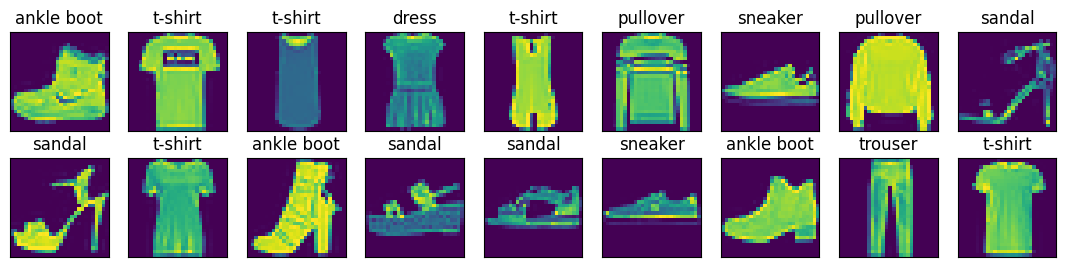

In [190]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download = True)
print(len(mnist_train), len(mnist_test))
print(len(mnist_test[0]))
print(mnist_test[0][0].shape)
X, y = next(iter(DataLoader(mnist_train, batch_size=18)))
print(f'The shape of X is {X.shape}') #估计是从 (18, 1, 28, 28) 变成了 ( 18, 28, 28 )
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))
plt.show()

In [191]:
#### 创建一个dataloader
train_iter = DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4)
test_iter = DataLoader(mnist_test, batch_size, shuffle=True, num_workers=4)

In [192]:
num_inputs = 784 #展平长度为784的向量
num_outputs = 10 #10输出，也对应10类别

# 权重w：均值为0，标准差为0.01，数量size为输入输出的数量
# size=(num_inputs, num_outputs)：行数为输入的个数，列数等于输出的个数
# requires_grad=True表明要计算梯度
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


In [ ]:
# 定义softmax函数
def softmax(X):
    X_exp = torch.exp(X) # 对每个元素做指数运算
    partition = X_exp.sum(1, keepdim=True) # 对每行进行求和
    return X_exp / partition  # 这里应用了广播机制


In [194]:
def net(X):
	# 权重为784×10的矩阵，这里将原始图像的列数大小转换为权重w矩阵的行数大小
	# 模型简单看来为：softmax(wx' + b)
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)


In [195]:
# 定义交叉熵损失函数
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y]) 

In [196]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    # len是查看矩阵的行数
    # y_hat.shape[1]就是去列数
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    	# 第2个维度为预测标签，取最大元素
        y_hat = y_hat.argmax(axis=1) 

	#  #将y_hat转换为y的数据类型然后作比较，cmp函数存储bool类型
    cmp = y_hat.type(y.dtype) == y 
    return float(cmp.type(y.dtype).sum()) #将正确预测的数量相加


#### 手动从0开始实现
需要手动实现softmax对FashionMNIST数据集进行分类，最重要的就是要先了解线性层的输入和输出，线性层输入为[1, 28x28=784]的向量，输出是[10, 1]的概率向量。

所以中间就需要乘以大小为[784, 10]的张量M，训练的目的就是对M进行训练，使得结果[10, 1]输出的概率更加符合标签的表现

In [ ]:
# 手动初始化参数
input_dim = 28 * 28  # 784 像素
output_dim = 10      # 10 个类别
learning_rate = 0.1

In [258]:
# 使用 Xavier 初始化权重
W = torch.randn(input_dim, output_dim) * (2 / (input_dim + output_dim))**0.5
b = torch.zeros(output_dim)

In [ ]:
# 手动实现 Softmax 函数
def softmax(x):
    # 减去最大值提高数值稳定性
    exp_x = torch.exp(x - torch.max(x, dim=1, keepdim=True)[0])
    return exp_x / exp_x.sum(dim=1, keepdim=True)

In [ ]:
# 手动实现交叉熵损失
def cross_entropy_loss(y_pred, y_true):
    # 将标签转换为 one-hot 编码
    y_one_hot = torch.zeros_like(y_pred)
    y_one_hot[range(len(y_true)), y_true] = 1
    
    # 计算损失 (添加小常数防止 log(0))
    loss = -torch.sum(y_one_hot * torch.log(y_pred + 1e-8)) / len(y_true)
    return loss

In [ ]:
# 训练循环
num_epochs = 10

loss_items = []
train_acc_items = []
test_acc_items = []

for epoch in range(num_epochs):
    total_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_iter:
        # 预处理：展平图像
        images = images.view(-1, input_dim)
        
        # 前向传播
        logits = images @ W + b
        probs = softmax(logits)
        
        # 计算损失
        loss = cross_entropy_loss(probs, labels)
        total_loss += loss.item()
        
        # 手动计算梯度
        batch_size = images.size(0)
        
        # 计算输出层梯度
        d_logits = (probs - torch.nn.functional.one_hot(labels, num_classes=10)) / batch_size
        
        # 反向传播
        dW = images.t() @ d_logits
        db = torch.sum(d_logits, dim=0)
        
        # 更新参数
        W -= learning_rate * dW
        b -= learning_rate * db
        
        # 计算准确率
        _, predicted = torch.max(probs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    

    # 打印每轮统计信息
    ## 计算训练集的准确率
    train_acc = 100 * correct / total

    # 重置参数
    correct = 0
    total = 0

    ## 对测试集进行测试
    for images, labels in test_iter:
        # 预处理：展平图像
        images = images.view(-1, input_dim)
        # 前向传播
        logits = images @ W + b
        probs = softmax(logits)
        # 计算输出层梯度
        d_logits = (probs - torch.nn.functional.one_hot(labels, num_classes=10)) / batch_size
        # 计算准确率
        _, predicted = torch.max(probs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    ## 计算在测试集中的准确率
    test_acc = 100 * correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Loss: {total_loss/len(train_iter):.4f}, '
          f'Accuracy: {train_acc:.2f}% '
          f'Accuracy: {test_acc:.2f}%')
    loss_items.append(total_loss)
    train_acc_items.append(train_acc)
    test_acc_items.append(test_acc)

    

Epoch [1/10], Loss: 0.4245, Accuracy: 85.51%Accuracy: 83.40%
Epoch [2/10], Loss: 0.4218, Accuracy: 85.59%Accuracy: 83.65%
Epoch [3/10], Loss: 0.4187, Accuracy: 85.66%Accuracy: 83.05%
Epoch [4/10], Loss: 0.4177, Accuracy: 85.68%Accuracy: 84.25%
Epoch [5/10], Loss: 0.4139, Accuracy: 85.76%Accuracy: 84.14%
Epoch [6/10], Loss: 0.4128, Accuracy: 85.83%Accuracy: 83.53%
Epoch [7/10], Loss: 0.4106, Accuracy: 85.92%Accuracy: 84.20%
Epoch [8/10], Loss: 0.4096, Accuracy: 85.90%Accuracy: 84.25%
Epoch [9/10], Loss: 0.4072, Accuracy: 86.02%Accuracy: 83.85%
Epoch [10/10], Loss: 0.4073, Accuracy: 85.88%Accuracy: 84.05%


In [268]:
# 模型评估
with torch.no_grad():
    test_correct = 0
    test_total = 0
    
    for images, labels in test_iter:
        images = images.view(-1, input_dim)
        logits = images @ W + b
        probs = softmax(logits)
        _, predicted = torch.max(probs, 1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)
    
    test_acc = 100 * test_correct / test_total
    print(f'\nFinal Test Accuracy: {test_acc:.2f}%')


Final Test Accuracy: 84.05%


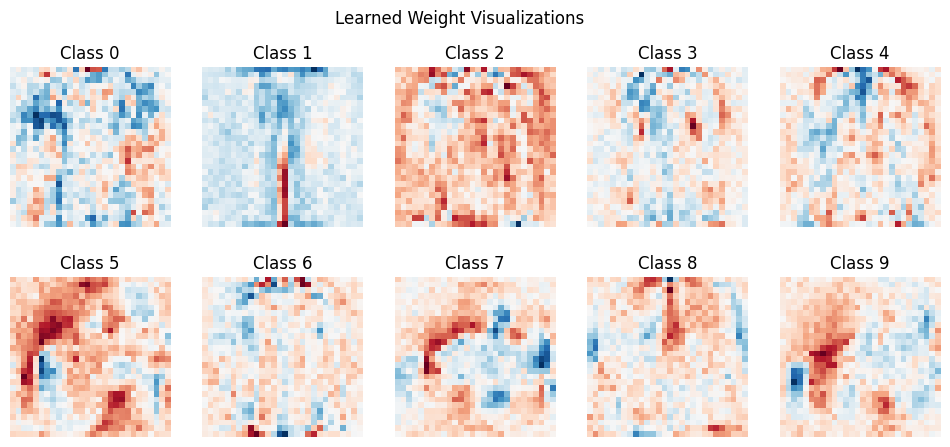

In [269]:
# 可视化部分权重
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(W[:, i].view(28, 28).detach().numpy(), cmap='RdBu')
    ax.set_title(f'Class {i}')
    ax.axis('off')
plt.suptitle('Learned Weight Visualizations')
plt.show()

In [274]:
def plot_train_eval_item(model, loss_items, train_acc_items, test_acc_items):
    loss_arr = []

    for item in loss_items:
        loss_arr.append(item)
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 绘制损失曲线
    ax1.plot(range(num_epochs), loss_arr, label='Training Loss')
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    
    # 绘制准确率曲线
    ax2.plot(range(num_epochs), train_acc_items, label='Train Accuracy')
    ax2.plot(range(num_epochs), test_acc_items, label='Test Accuracy')
    ax2.set_title('Accuracy during Training')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

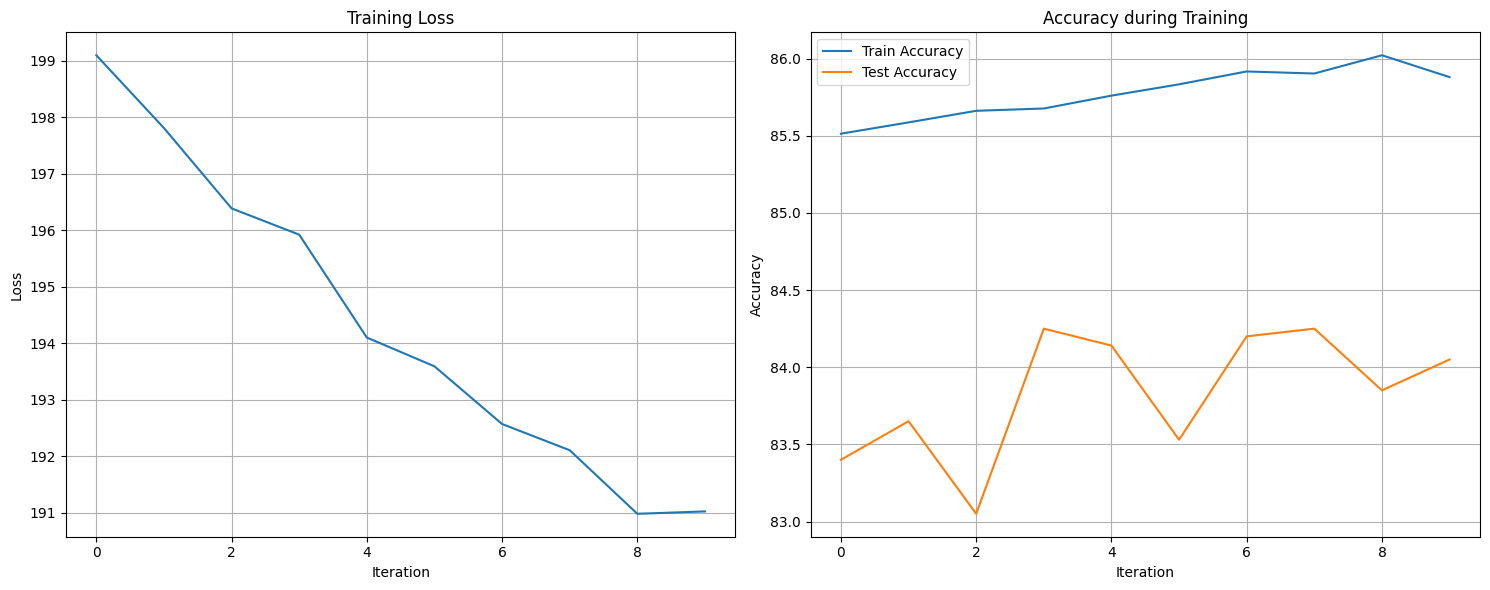

In [275]:
plot_train_eval_item(model, loss_items, train_acc_items, test_acc_items)

#### 使用torch.nn库实现

In [207]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)
[num_features, num_classes] = [784, 10]
model = SoftmaxRegression(num_features, num_classes)
model = model.to('cuda')


In [208]:
def cross_entropy_loss(y_hat, y):
    # 计算Softmax
    exp_y_hat = torch.exp(y_hat)
    softmax = exp_y_hat / exp_y_hat.sum(dim=1, keepdim=True)

    # 选择目标类别的概率
    batch_size = y.size(0)
    predicted_probs = softmax[torch.arange(batch_size), y]

    # 计算交叉熵损失
    loss = -torch.log(predicted_probs)
    return loss.mean()

criterion = cross_entropy_loss
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [282]:
def plot_train_eval(model, loss_items, train_acc_items, test_acc_items):
    loss_arr = []

    for item in loss_items:
        loss_arr.append(item.item())
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 绘制损失曲线
    ax1.plot(range(num_epochs), loss_arr, label='Training Loss')
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    
    # 绘制准确率曲线
    ax2.plot(range(num_epochs), train_acc_items, label='Train Accuracy')
    ax2.plot(range(num_epochs), test_acc_items, label='Test Accuracy')
    ax2.set_title('Accuracy during Training')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

In [283]:
def eval_Accuracy(data_iter, model):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        X = X.view(X.size(0), -1)
        X.to('cuda')
        y.to('cuda')
        acc_sum = acc_sum + (model(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [ ]:
num_epochs = 100

loss_items = []
train_acc_items = []
test_acc_items = []

for epoch in range(num_epochs):
    model = model.to('cuda')
    for X, y in train_iter:
        # 前向传播
        X = X.view(X.size(0), -1)
        X = X.to('cuda')
        y = y.to('cuda')
        outputs = model(X)
        
        loss = criterion(outputs, y)
    
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print("当前轮数: ", epoch+1, "Loss: ", loss.item())

    demo_model = model.to('cpu')
    test_acc = eval_Accuracy(test_iter, demo_model)
    train_acc = eval_Accuracy(train_iter, demo_model)

    loss_items.append(loss)
    train_acc_items.append(train_acc)
    test_acc_items.append(test_acc)

In [ ]:
model.to('cpu')
print(eval_Accuracy(test_iter, model))

0.8374


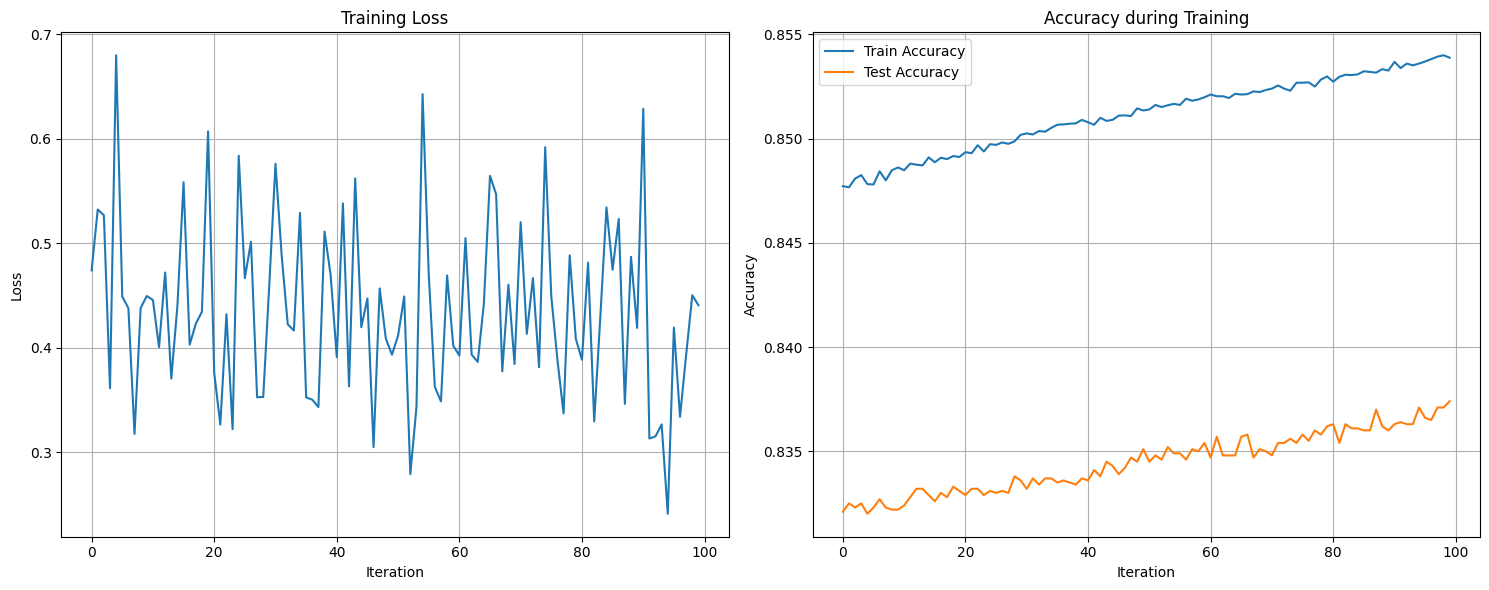

In [ ]:
plot_train_eval(model, loss_items, train_acc_items, test_acc_items)

In [ ]:
### 发现训练过程中的loss函数值抖动过大，并且训练集和测试集的准确率变化波动较大，同时提升也不是很明显
### 同时发现test数据集的acc还有上升的空间
### 下面考虑更换优化器，降低学习率解决，同时提高训练轮数，使得训练出来的模型更加拟合
model = SoftmaxRegression(num_features, num_classes)
model = model.to('cuda')
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [288]:
num_epochs = 200

loss_items = []
train_acc_items = []
test_acc_items = []

for epoch in range(num_epochs):
    model = model.to('cuda')
    for X, y in train_iter:
        # 前向传播
        X = X.view(X.size(0), -1)
        X = X.to('cuda')
        y = y.to('cuda')
        outputs = model(X)
        
        loss = criterion(outputs, y)
    
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print("当前轮数: ", epoch+1, "Loss: ", loss.item())

    demo_model = model.to('cpu')
    test_acc = eval_Accuracy(test_iter, demo_model)
    train_acc = eval_Accuracy(train_iter, demo_model)

    loss_items.append(loss)
    train_acc_items.append(train_acc)
    test_acc_items.append(test_acc)

当前轮数:  10 Loss:  0.8932913541793823
当前轮数:  20 Loss:  0.7105073928833008
当前轮数:  30 Loss:  0.6606193780899048
当前轮数:  40 Loss:  0.6666297316551208
当前轮数:  50 Loss:  0.5910619497299194
当前轮数:  60 Loss:  0.4708493649959564
当前轮数:  70 Loss:  0.6600971221923828
当前轮数:  80 Loss:  0.37462443113327026
当前轮数:  90 Loss:  0.5527859926223755
当前轮数:  100 Loss:  0.4613809585571289
当前轮数:  110 Loss:  0.34371015429496765
当前轮数:  120 Loss:  0.45292288064956665
当前轮数:  130 Loss:  0.6337712407112122
当前轮数:  140 Loss:  0.4865648150444031
当前轮数:  150 Loss:  0.39861834049224854
当前轮数:  160 Loss:  0.44024354219436646
当前轮数:  170 Loss:  0.4188152253627777
当前轮数:  180 Loss:  0.5555034875869751
当前轮数:  190 Loss:  0.48520129919052124
当前轮数:  200 Loss:  0.44606834650039673


In [289]:
model.to('cpu')
print(eval_Accuracy(test_iter, model))

0.833


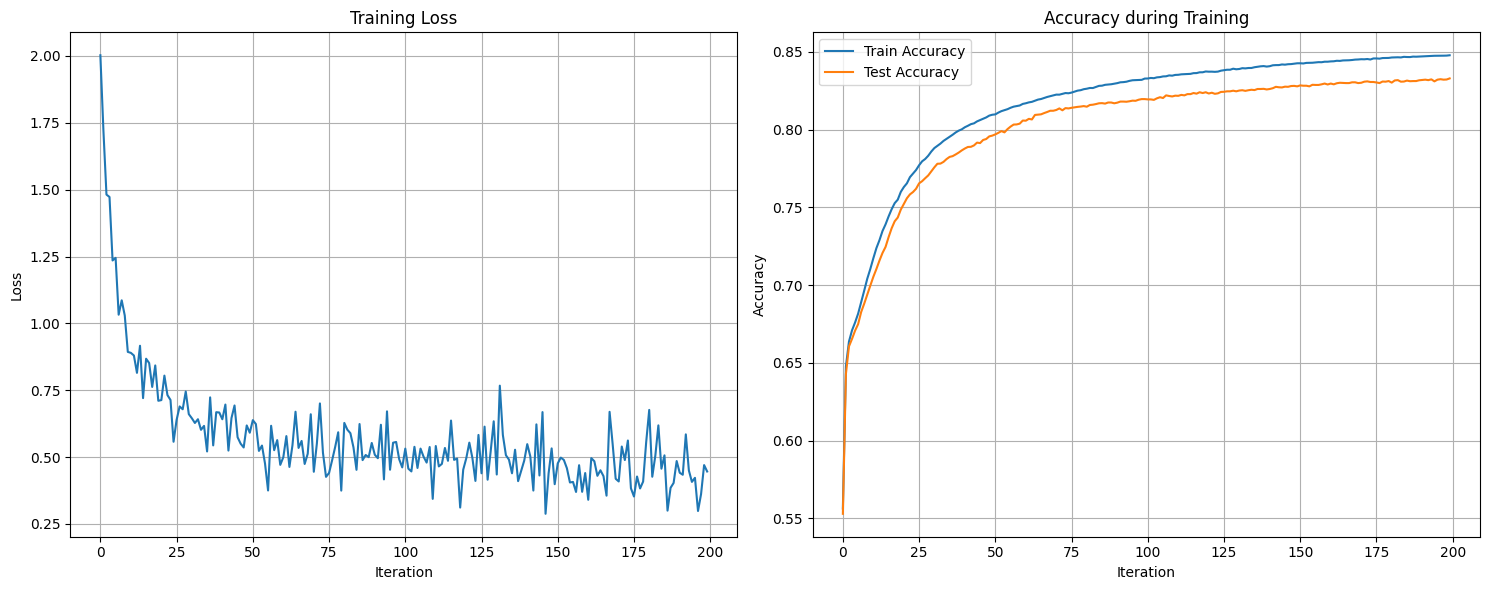

In [290]:
plot_train_eval(model, loss_items, train_acc_items, test_acc_items)

可以看到，当前参数训练出来的过程相对来说比较平滑，但是训练出来的精度没有很大的区别，可能是模型本身不足够复杂的原因